In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load Titanic dataset
data = sns.load_dataset('titanic')

# Display the first few rows of the dataset
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Drop rows with missing 'age' values
data_cleaned = data.dropna(subset=['age'])

# Randomly split the dataset into two equal groups for paired testing
# Simulating as if these are two related age measurements (before and after)
np.random.seed(42)
data_cleaned['age_before'] = data_cleaned['age'] + np.random.normal(0, 1, size=len(data_cleaned))  # Simulated age before
data_cleaned['age_after'] = data_cleaned['age'] + np.random.normal(0, 1, size=len(data_cleaned))   # Simulated age after

# Display the dataset after adding 'age_before' and 'age_after'
data_cleaned[['age_before', 'age_after']].head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16020\1051116876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_before'] = data_cleaned['age'] + np.random.normal(0, 1, size=len(data_cleaned))  # Simulated age before
C:\Users\ahmed\AppData\Local\Temp\ipykernel_16020\1051116876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_after'] = data_cleaned['age'] + np.random.normal(0, 1, size=len(data_cleaned))   # Simulated age after


,age_before,age_after
0,22.496714,21.962365
1,37.861736,39.103302
2,26.647689,26.114228
3,36.523030,35.150302
4,34.765847,34.636388


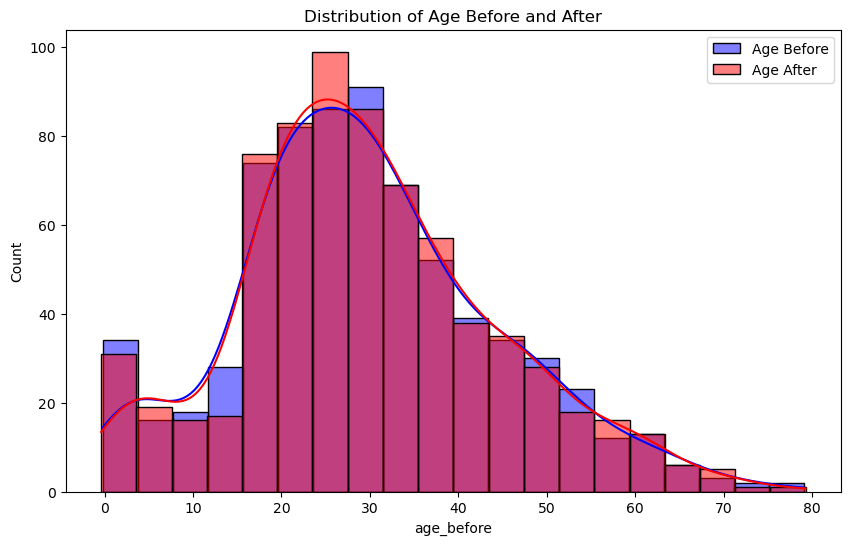

In [3]:
# Plot the distributions of 'age_before' and 'age_after'
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['age_before'], color='blue', label='Age Before', kde=True)
sns.histplot(data_cleaned['age_after'], color='red', label='Age After', kde=True)
plt.legend()
plt.title('Distribution of Age Before and After')
plt.show()


In [4]:
# Perform Wilcoxon Signed-Rank Test on the paired samples
w_stat, p_value = stats.wilcoxon(data_cleaned['age_before'], data_cleaned['age_after'])

# Output the Wilcoxon statistic and p-value
w_stat, p_value

(114917.0, 0.021143074864391424)

In [5]:
# Significance level (alpha)
alpha = 0.05

# Interpretation of Wilcoxon Signed-Rank Test result
if p_value < alpha:
    print(f"The p-value ({p_value}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis. There is a significant difference between the paired samples.")
else:
    print(f"The p-value ({p_value}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis. There is no significant difference between the paired samples.")


The p-value (0.021143074864391424) is less than the significance level (0.05).
We reject the null hypothesis. There is a significant difference between the paired samples.
